<a href="https://colab.research.google.com/github/babasanku/hello_world/blob/master/MTH552A_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MTH552A Project 

**Base Accuracies for different models:**

Model | FC1 | FC2 | Conv1 | Conv2
--- | --- | --- | --- | --- |
Base Acc. | 0.9716 | 0.9697 | 0.9915 | 0.9921

**Accuracy on adversarial examples:** \\
(columns represent models and rows represent where the adversarial examples were generarted)

Model | FC1 | FC2 | Conv1 | Conv2
--- | --- | --- | --- | --- |
FC1 | 0.0077 | 0.1098 | 0.9757 | 0.9739
FC2 | 0.0604 | 0.0257 | 0.9739 | 0.9730
Conv1 | 0.9160 | 0.9164 | 0.7013 | 0.9418
Conv2 | 0.8882 | 0.9034 | 0.9356 | 0.7935

**Accuracy on adversarial examples after adversarial training:**

Model | FC1 | FC2 | Conv1 | Conv2
--- | --- | --- | --- | --- |
FC1 | 1.0000 | 0.9456 | 0.9942 | 0.9448
FC2 | 0.8756 | 1.0000 | 0.9948 | 0.9597
Conv1 | 1.0000 | 0.9431 | 1.0000 | 0.9700
Conv2 | 0.9329 | 0.9353 | 0.9905 | 1.0000

**Accuracy on newly generated adversarial examples:**

For base models:

Model | FC1 | FC2 | Conv1 | Conv2
--- | --- | --- | --- | --- |
FC1 | 0.0055 | 0.1315 | 0.9688 | 0.9777
FC2 | 0.0700 | 0.0351 | 0.9664 | 0.9774
Conv1 | 0.9125 | 0.9188 | 0.6363 | 0.9385
Conv2 | 0.9241 | 0.9295 | 0.9215 | 0.8435

For adversarially trained models:

Model | FC1 | FC2 | Conv1 | Conv2
--- | --- | --- | --- | --- |
FC1 | 0.9997 | 0.9133 | 0.9894 | 0.8421
FC2 | 0.8167 | 0.9995 | 0.9911 | 0.7972
Conv1 | 0.9241 | 0.9326 | 0.9987 | 0.8790
Conv2 | 0.9356 | 0.9362 | 0.9628 | 0.9990

**Accuracy of adversarially trained models on original images**

Model | FC1 | FC2 | Conv1 | Conv2
--- | --- | --- | --- | --- |
Adv Acc. | 0.9733 | 0.9734 | 0.9911 | 0.9918

## Loading Libraries and dataset...

In [0]:
# Importing libraries
import numpy as np
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

In [2]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Normalizing and reshaping data...
training_images, test_images = training_images / 255.0 , test_images / 255.0

training_images = training_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)
input_shape = (28, 28, 1)

## Fully Connected Model

In [4]:
# Model building (Fully connected)...
model_fc_1 = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1024, activation = tf.nn.relu),
                                     tf.keras.layers.Dense(256, activation = tf.nn.relu),
                                     tf.keras.layers.Dense(10, activation = tf.nn.softmax)
  ])

model_fc_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model_fc_1.fit(training_images, training_labels, batch_size=512,  epochs = 10)
model_fc_1.summary()
model_fc_1.evaluate(test_images, test_labels, batch_size = 512)

Epoch 1/10
118/118 [==============================] - 1s 6ms/step - loss: 0.8380 - accuracy: 0.8082
Epoch 2/10
118/118 [==============================] - 1s 6ms/step - loss: 0.2814 - accuracy: 0.9235
Epoch 3/10
118/118 [==============================] - 1s 7ms/step - loss: 0.2160 - accuracy: 0.9407
Epoch 4/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1782 - accuracy: 0.9506
Epoch 5/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1523 - accuracy: 0.9577
Epoch 6/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1325 - accuracy: 0.9635
Epoch 7/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1174 - accuracy: 0.9680
Epoch 8/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1040 - accuracy: 0.9717
Epoch 9/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0935 - accuracy: 0.9743
Epoch 10/10
118/118 [==============================] - 1s 6ms/step - loss: 0.0842 - accuracy: 0.9771

[0.09793858975172043, 0.9708999991416931]

In [5]:
model_fc_2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1024, activation = tf.nn.relu),
                                     tf.keras.layers.Dropout(0.2),
                                     tf.keras.layers.Dense(256, activation = tf.nn.relu),
                                     tf.keras.layers.Dropout(0.2),
                                     tf.keras.layers.Dense(10, activation = tf.nn.softmax)
  ])

model_fc_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model_fc_2.fit(training_images, training_labels, batch_size=512,  epochs = 10)
model_fc_2.summary()
model_fc_2.evaluate(test_images, test_labels, batch_size = 512)

Epoch 1/10
118/118 [==============================] - 1s 6ms/step - loss: 0.9571 - accuracy: 0.7584
Epoch 2/10
118/118 [==============================] - 1s 6ms/step - loss: 0.3433 - accuracy: 0.9025
Epoch 3/10
118/118 [==============================] - 1s 6ms/step - loss: 0.2620 - accuracy: 0.9256
Epoch 4/10
118/118 [==============================] - 1s 6ms/step - loss: 0.2153 - accuracy: 0.9385
Epoch 5/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1863 - accuracy: 0.9459
Epoch 6/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1637 - accuracy: 0.9527
Epoch 7/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1466 - accuracy: 0.9578
Epoch 8/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1317 - accuracy: 0.9625
Epoch 9/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1197 - accuracy: 0.9648
Epoch 10/10
118/118 [==============================] - 1s 6ms/step - loss: 0.1098 - accuracy: 0.9686

[0.0980391576886177, 0.9702000021934509]

## Convolutional Neural Networks (CNN) Model

In [6]:
# Model building (Convolutional Neural Networks)...
model_cnn_1 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, input_shape = input_shape),
                                        tf.keras.layers.MaxPooling2D((2,2)),
                                        tf.keras.layers.Conv2D(256, (3,3), activation=tf.nn.relu),
                                        tf.keras.layers.MaxPooling2D((2,2)),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_cnn_1.compile(optimizer = tf.keras.optimizers.Adam(),
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

model_cnn_1.fit(training_images, training_labels, batch_size=512,  epochs = 10)
model_cnn_1.summary()
model_cnn_1.evaluate(test_images, test_labels, batch_size = 512)

Epoch 1/10
118/118 [==============================] - 6s 50ms/step - loss: 0.2662 - accuracy: 0.9212
Epoch 2/10
118/118 [==============================] - 6s 49ms/step - loss: 0.0577 - accuracy: 0.9826
Epoch 3/10
118/118 [==============================] - 6s 49ms/step - loss: 0.0403 - accuracy: 0.9878
Epoch 4/10
118/118 [==============================] - 6s 49ms/step - loss: 0.0300 - accuracy: 0.9908
Epoch 5/10
118/118 [==============================] - 6s 49ms/step - loss: 0.0232 - accuracy: 0.9930
Epoch 6/10
118/118 [==============================] - 6s 49ms/step - loss: 0.0186 - accuracy: 0.9942
Epoch 7/10
118/118 [==============================] - 6s 49ms/step - loss: 0.0134 - accuracy: 0.9957
Epoch 8/10
118/118 [==============================] - 6s 50ms/step - loss: 0.0107 - accuracy: 0.9967
Epoch 9/10
118/118 [==============================] - 6s 50ms/step - loss: 0.0097 - accuracy: 0.9968
Epoch 10/10
118/118 [==============================] - 6s 50ms/step - loss: 0.0086 - accura

[0.02771899662911892, 0.9916999936103821]

This was a naive CNN model. Again notice the difference between training accuracy and validation accuracy. This points to overfitting in the model. Below is a more complex architecture and includes Dropout layers to deal with over-fitting.

In [7]:
model_cnn_2 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=input_shape),
                                      tf.keras.layers.Conv2D(32, (3,3), activation = tf.nn.relu),
                                      tf.keras.layers.MaxPooling2D((2,2)),
                                      tf.keras.layers.Dropout(0.1),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dropout(0.25),
                                      tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(512, activation = tf.nn.relu),
                                      tf.keras.layers.Dropout(0.5),
                                      tf.keras.layers.Dense(10, activation = 'softmax')
  ])

model_cnn_2.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model_cnn_2.fit(training_images, training_labels, batch_size=512,  epochs = 10)
model_cnn_2.summary()
model_cnn_2.evaluate(test_images, test_labels, batch_size = 512)

Epoch 1/10
118/118 [==============================] - 3s 29ms/step - loss: 0.4885 - accuracy: 0.8457
Epoch 2/10
118/118 [==============================] - 3s 29ms/step - loss: 0.1195 - accuracy: 0.9644
Epoch 3/10
118/118 [==============================] - 3s 29ms/step - loss: 0.0831 - accuracy: 0.9748
Epoch 4/10
118/118 [==============================] - 3s 29ms/step - loss: 0.0658 - accuracy: 0.9799
Epoch 5/10
118/118 [==============================] - 3s 29ms/step - loss: 0.0594 - accuracy: 0.9816
Epoch 6/10
118/118 [==============================] - 3s 29ms/step - loss: 0.0487 - accuracy: 0.9847
Epoch 7/10
118/118 [==============================] - 3s 29ms/step - loss: 0.0448 - accuracy: 0.9863
Epoch 8/10
118/118 [==============================] - 3s 29ms/step - loss: 0.0400 - accuracy: 0.9873
Epoch 9/10
118/118 [==============================] - 3s 29ms/step - loss: 0.0360 - accuracy: 0.9886
Epoch 10/10
118/118 [==============================] - 3s 29ms/step - loss: 0.0332 - accura

[0.027146698907017708, 0.991599977016449]

# Generating Adversarial examples using FGSM

In [0]:
# Generate integer labels from model output
def get_int_label(probs):
  labels = np.argmax(probs, axis = 1)
  return labels

# Generate one_hot_labels from labels
def get_one_hot_label(labels):
  one_hot_label = tf.keras.utils.to_categorical(labels, num_classes=10)
  return one_hot_label

# Generate signed_gradient
def perturbation_generator(input_image, input_label, loss_object, model):
  if loss_object is None:
    loss_object = tf.keras.losses.CategoricalCrossentropy()
  else:
    loss_object = tf.keras.losses.get(loss_object)

  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model(input_image)
    loss = loss_object(input_label, prediction)

  gradient = tape.gradient(loss, input_image)   # Get the gradients of the loss w.r.t to the input image.
  signed_grad = tf.sign(gradient)   # Get the sign of the gradients to create the perturbation

  return signed_grad

# Generate adversarial image data for all images
def adversarial_imageset_generator(eps, model, data, labels, loss = None):
  perturbed_imgs = np.zeros_like(data)

  for i in range(len(perturbed_imgs)):
    image = np.expand_dims(data[i], axis=0)
    image = tf.convert_to_tensor(image)
    label = np.expand_dims(labels[i], axis = 0)
    label = tf.convert_to_tensor(label)
    
    perturbation = perturbation_generator(image, label, loss, model)
    adv_img = image + eps*perturbation
    perturbed_imgs[i] = adv_img[0]

  return perturbed_imgs

def Accuracy(data, labels, model):
  pred = model.predict(data)
  pred_labels = get_int_label(pred)

  compare = np.equal(pred_labels, labels)
  correct = np.count_nonzero(compare)
  accuracy = correct/len(pred)  
  
  return accuracy

In [0]:
img_data = training_images
one_hot_labels = get_one_hot_label(training_labels)

For each model here we generate a separate set of 20000 adversarial examples.

In [10]:
models = [model_fc_1, model_fc_2, model_cnn_1, model_cnn_2]
epsilon = 0.1
adv_exmp = {}
adv_labels = {}
idx = {}
i = 1
n = 20000

for model in models:
  np.random.seed(i)
  ind = np.random.choice(60000, n, replace=False)
  mini_batch = img_data[ind]
  labels = training_labels[ind].reshape(n)

  perturbed_imgs = adversarial_imageset_generator(eps = epsilon, model = model, data = mini_batch, labels = get_one_hot_label(labels))
  adv_exmp[i] = perturbed_imgs
  adv_labels[i] = labels
  idx[i] = ind

  i = i + 1


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Now we will evaluate each model on all sets of adversarial examples as well.

In [11]:
acc_1 = []
for model in models:
  acc = []

  for j in np.arange(1, 5):
    hist = model.evaluate(adv_exmp[j], adv_labels[j], batch_size=512)
    acc.append(hist[1])
  
  acc_1.append(acc)

40/40 [==============================] - 0s 11ms/step - loss: 0.5190 - accuracy: 0.8402


In [12]:
acc_1

[[0.006099999882280827,
  0.07180000096559525,
  0.9103999733924866,
  0.9243999719619751],
 [0.13054999709129333,
  0.034699998795986176,
  0.9157500267028809,
  0.9301999807357788],
 [0.9677500128746033,
  0.9660999774932861,
  0.630649983882904,
  0.9244999885559082],
 [0.9752500057220459,
  0.9765499830245972,
  0.9384999871253967,
  0.8402000069618225]]

We will now contruct other models with same architecture but now they will be trained on both, the natural images and adversarial images.

In [14]:
# Adversarially trained model 1
adv_model_1 = tf.keras.models.clone_model(model_fc_1)
adv_model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

adv_train_data = np.concatenate((training_images, adv_exmp[1]), axis = 0)
adv_train_labels = np.concatenate((training_labels, adv_labels[1]), axis = 0)

adv_model_1.fit(adv_train_data, adv_train_labels, epochs = 10, batch_size = 512)

# Adversarially trained model 2
adv_model_2 = tf.keras.models.clone_model(model_fc_2)
adv_model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

adv_train_data = np.concatenate((training_images, adv_exmp[2]), axis = 0)
adv_train_labels = np.concatenate((training_labels, adv_labels[2]), axis = 0)

adv_model_2.fit(adv_train_data, adv_train_labels, epochs = 10, batch_size = 512)

# Adversarially trained model 3
adv_model_3 = tf.keras.models.clone_model(model_cnn_1)
adv_model_3.compile(optimizer = tf.keras.optimizers.Adam(),
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

adv_train_data = np.concatenate((training_images, adv_exmp[3]), axis = 0)
adv_train_labels = np.concatenate((training_labels, adv_labels[3]), axis = 0)

adv_model_3.fit(adv_train_data, adv_train_labels, epochs = 10, batch_size = 512)

# Adversarially trained model 4
adv_model_4 = tf.keras.models.clone_model(model_cnn_2)
adv_model_4.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

adv_train_data = np.concatenate((training_images, adv_exmp[4]), axis = 0)
adv_train_labels = np.concatenate((training_labels, adv_labels[4]), axis = 0)

adv_model_4.fit(adv_train_data, adv_train_labels, epochs = 10, batch_size = 512)

adv_models = [adv_model_1, adv_model_2, adv_model_3, adv_model_4]

Epoch 1/10
157/157 [==============================] - 1s 6ms/step - loss: 0.7133 - accuracy: 0.8387
Epoch 2/10
157/157 [==============================] - 1s 6ms/step - loss: 0.2306 - accuracy: 0.9380
Epoch 3/10
157/157 [==============================] - 1s 6ms/step - loss: 0.1686 - accuracy: 0.9546
Epoch 4/10
157/157 [==============================] - 1s 6ms/step - loss: 0.1347 - accuracy: 0.9628
Epoch 5/10
157/157 [==============================] - 1s 6ms/step - loss: 0.1118 - accuracy: 0.9693
Epoch 6/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0954 - accuracy: 0.9737
Epoch 7/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0815 - accuracy: 0.9778
Epoch 8/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0716 - accuracy: 0.9803
Epoch 9/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0637 - accuracy: 0.9825
Epoch 10/10
157/157 [==============================] - 1s 6ms/step - loss: 0.0559 - accuracy: 0.9850

We will now again evaluate these adversarially trained models on previously generated adversarial examples.

In [15]:
acc_2 = []
for model in adv_models:
  acc = []

  for j in np.arange(1, 5):
    hist = model.evaluate(adv_exmp[j], adv_labels[j], batch_size=512)
    acc.append(hist[1])
  
  acc_2.append(acc)

40/40 [==============================] - 0s 11ms/step - loss: 0.0010 - accuracy: 0.9998


In [16]:
acc_2

[[0.9998000264167786,
  0.8129000067710876,
  0.9218000173568726,
  0.9344499707221985],
 [0.9126999974250793,
  0.9998499751091003,
  0.9310500025749207,
  0.9352499842643738],
 [0.9882500171661377,
  0.9917500019073486,
  0.9998000264167786,
  0.9610499739646912],
 [0.8405500054359436,
  0.7977499961853027,
  0.8766999840736389,
  0.9998499751091003]]

Finally we generate new sets of adversarial examples and evaluate both adversarially trained models and base models for comparison on these new sets

In [0]:
epsilon = 0.1
adv_exmp_test = {}
adv_labels_test = {}
idx_test = {}
i = 1
n = 20000

for model in models:
  np.random.seed(i + 100)
  ind = np.random.choice(60000, n, replace=False)
  mini_batch = img_data[ind]
  labels = training_labels[ind].reshape(n)

  perturbed_imgs = adversarial_imageset_generator(eps = epsilon, model = model, data = mini_batch, labels = get_one_hot_label(labels))
  adv_exmp_test[i] = perturbed_imgs
  adv_labels_test[i] = labels
  idx_test[i] = ind

  i = i + 1

In [18]:
acc_3 = []
for model in adv_models:
  acc = []

  for j in np.arange(1, 5):
    hist = model.evaluate(adv_exmp_test[j], adv_labels_test[j], batch_size=512)
    acc.append(hist[1])
  
  acc_3.append(acc)

40/40 [==============================] - 0s 11ms/step - loss: 0.0031 - accuracy: 0.9990


In [19]:
acc_3

[[0.9996500015258789,
  0.8166999816894531,
  0.9241499900817871,
  0.9356499910354614],
 [0.9132500290870667,
  0.9995499849319458,
  0.9326000213623047,
  0.9362499713897705],
 [0.9893500208854675,
  0.9910500049591064,
  0.9987499713897705,
  0.9628000259399414],
 [0.8421000242233276,
  0.7972000241279602,
  0.8790000081062317,
  0.9989500045776367]]

In [20]:
acc_4 = []
for model in models:
  acc = []

  for j in np.arange(1, 5):
    hist = model.evaluate(adv_exmp_test[j], adv_labels_test[j], batch_size=512)
    acc.append(hist[1])
  
  acc_4.append(acc)

40/40 [==============================] - 0s 11ms/step - loss: 0.5150 - accuracy: 0.8435


In [21]:
acc_5 = []
for model in adv_models:

  hist = model.evaluate(test_images, test_labels, batch_size=512)
  acc_5.append(hist[1])

20/20 [==============================] - 0s 13ms/step - loss: 0.0269 - accuracy: 0.9918


# Visualization

Genereated from FC1
Genereated from FC2
Genereated from Conv1
Genereated from Conv2


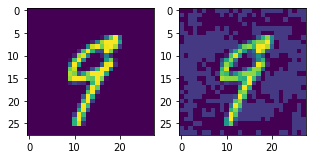

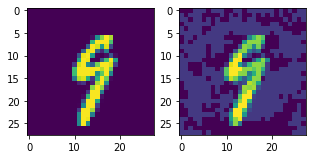

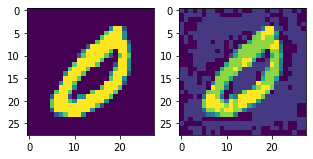

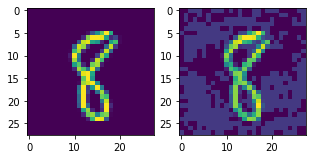

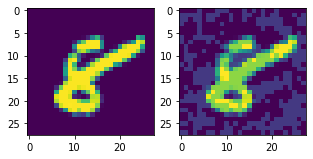

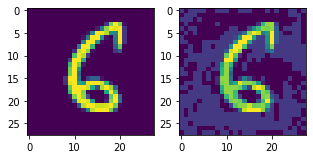

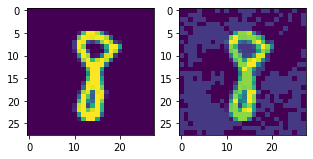

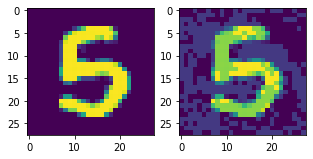

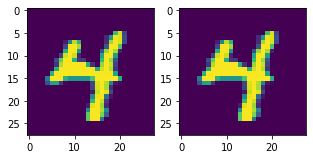

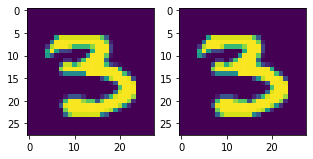

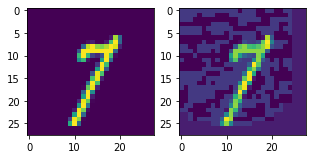

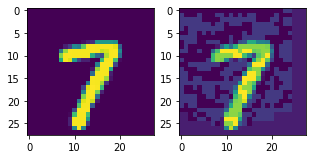

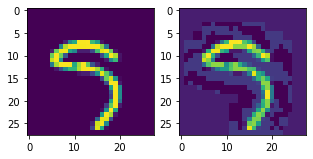

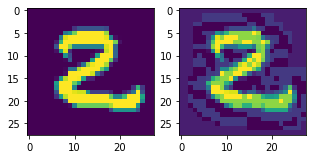

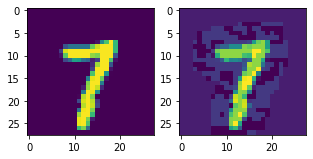

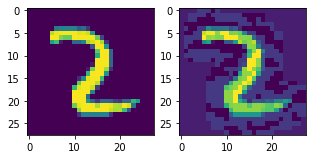

In [31]:
# Want to visualize 4 perturbed images from each examples.
name = ['FC1', 'FC2', 'Conv1', 'Conv2']

for i in np.arange(1, 5):
  ind = np.random.choice(20000, 4, replace = False)

  print("Genereated from " + name[i-1])
  for j in ind:
    k = idx[i][j]
    nat_img = img_data[k]
    nat_img = array_to_img(nat_img)

    adv_img = adv_exmp[i][j]
    adv_img = array_to_img(adv_img)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [5, 5])
    ax1.imshow(nat_img)
    ax2.imshow(adv_img)
    fig.show

17548

# Debugging & extras

(1, 28, 28, 1)


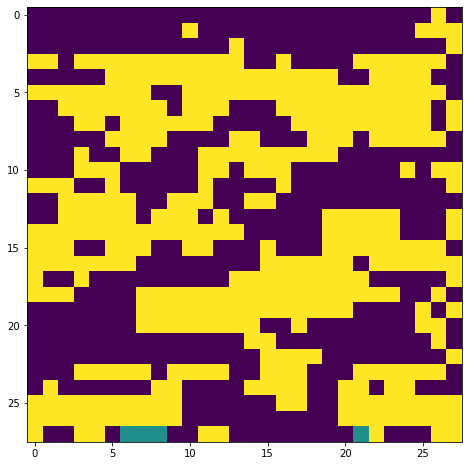

In [0]:
# Visualizing perturbations for a random image
i = np.random.choice(10000, 1)[0]

image = np.expand_dims(img_data[i], axis=0)
image = tf.convert_to_tensor(image)
label = np.expand_dims(one_hot_labels[i], axis = 0)
label = tf.convert_to_tensor(label)

perturbation = perturbation_generator(image, label, loss_object = 'categorical_crossentropy').numpy()
print(perturbation.shape)
x = array_to_img(perturbation[0])
plt.imshow(x)

In [26]:
i = np.random.choice(20000, 1)[0]
j = idx[i]

x = img_data[j]
x = array_to_img(x)

y = perturbed_imgs[i]
y = array_to_img(y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [3, 3])
ax1.imshow(x)
ax2.imshow(y)
fig.show

KeyError: ignored

In [27]:
img_data.shape

(60000, 28, 28, 1)